In [1]:
from printing_blob import MarkDetect
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import math
import time
from array import array
import yaml
import tkinter as tk
from tkinter import filedialog
import os

In [2]:
config_path = 'config.yaml'
mark_detect = MarkDetect(config_path)

In [3]:
# 选择需要处理的图片
root = tk.Tk()
root.withdraw()  # 隐藏主窗口
pic_path = filedialog.askopenfilename(initialdir=os.getcwd()+"mypic")  # 打开文件选择对话框

In [4]:
# TODO: 2024.5.23，测试Image__2024-04-24__ExposTime100ms.jpg，的红标会检测为黑色，需要矫正
img_default = cv2.imdecode(np.fromfile(pic_path, dtype=np.uint8), 1)

In [5]:
# 计算原始大小
origin_img_width, origin_img_height = img_default.shape[1], img_default.shape[0]
print('origin img width: ', origin_img_width)
print('origin img height: ', origin_img_height)

origin img width:  2048
origin img height:  800


In [6]:
mark_detect.mark_detect_rough(img_default)
mark_detect.mark_detect_show_boundary()

No: 0, area test NOT OK, Area: 1.0
No: 1, area test NOT OK, Area: 0.0
No: 2, area test NOT OK, Area: 19.5
No: 3, area test NOT OK, Area: 5.0
No: 4, area test NOT OK, Area: 26.5
No: 5, area test NOT OK, Area: 1.0
No: 6, area test NOT OK, Area: 21.0
No: 7, area test NOT OK, Area: 1.0
No: 8, area test NOT OK, Area: 2.0
No: 9, area test NOT OK, Area: 2.0
No: 10, area test NOT OK, Area: 0.0
No: 11, area test NOT OK, Area: 96.5
No: 12, area test NOT OK, Area: 12.5
No: 13, area test NOT OK, Area: 10.0
No: 14, area test NOT OK, Area: 7873.5
No: 15, area test OK, Area: 178.0
No: 16, area test NOT OK, Area: 287.5
No: 17, area test NOT OK, Area: 233.5
No: 18, area test NOT OK, Area: 253.0
No: 19, area test NOT OK, Area: 294.5
No: 20, area test NOT OK, Area: 0.0
No: 21, area test NOT OK, Area: 2132.0
No: 22, area test NOT OK, Area: 2906.5
No: 23, area test NOT OK, Area: 2168.5
No: 0, area test NOT OK, Area: 1.0
No: 1, area test NOT OK, Area: 0.0
No: 2, area test NOT OK, Area: 19.5
No: 3, area test

In [7]:
mark_detect.result_gray

[[182.75001525878906,
  133.25003051757812,
  array([[[181, 123]],
  
         [[180, 124]],
  
         [[179, 124]],
  
         [[174, 129]],
  
         [[174, 130]],
  
         [[172, 132]],
  
         [[172, 135]],
  
         [[180, 143]],
  
         [[181, 143]],
  
         [[182, 144]],
  
         [[183, 144]],
  
         [[184, 143]],
  
         [[185, 143]],
  
         [[186, 142]],
  
         [[187, 142]],
  
         [[187, 141]],
  
         [[188, 140]],
  
         [[189, 140]],
  
         [[189, 139]],
  
         [[190, 138]],
  
         [[191, 138]],
  
         [[192, 137]],
  
         [[192, 136]],
  
         [[193, 135]],
  
         [[193, 132]],
  
         [[192, 131]],
  
         [[192, 130]],
  
         [[190, 128]],
  
         [[189, 128]],
  
         [[184, 123]]], dtype=int32),
  ((182.75001525878906, 133.25003051757812),
   (18.384775161743164, 17.677669525146484),
   45.0),
  array([[170, 133],
         [182, 120],
         [195, 133],
 

In [15]:
cv2.imshow("draw",mark_detect.img_HSV)
cv2.waitKey(0)
cv2.destroyAllWindows()

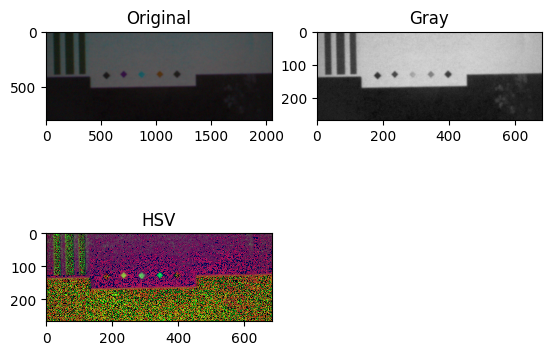

In [9]:
plt.subplot(221)
plt.imshow(img_default)
plt.title('Original')

plt.subplot(222)
plt.imshow(mark_detect.img_in, cmap='gray')
plt.title('Gray')

plt.subplot(223)
plt.imshow(mark_detect.img_HSV, interpolation='nearest')
plt.title('HSV')
plt.show()

In [10]:
if mark_detect.scaling != 1:
    mark_detect.mark_detect_fine(img_default)

No: 0, Area: 2725.0


In [17]:
a2

3555.9309312

In [ ]:
  


# 如果只检测出了部分色标（大于一个，小于全部），则尝试单独取0通道检测其他色标
if 1 <= len(mark_detect.result_gray) < mark_detect.mark_num:
    mark_detect.mark_detect_num_too_few(img_default)
    
if mark_detect.mark_type == 0 and mark_detect.result_pos.shape[0] > mark_detect.mark_num:
    mark_detect.mark_detect_num_too_many(img_default) 
    
detection_success, result_pos = mark_detect.mark_detect(img_default, origin_img_height)

print(result_pos)

# 计算结束时间
end_time = time.time()

execution_time = (end_time - start_time) * 1000
print("程序运行时间：", execution_time, "毫秒")

"""
2024.5.23 检测结果打印
"""
if detection_success:
    print("检测成功")
else:
    print("检测失败")

marks_typ = ["菱形", "圆形"]
colors_typ = ["青", "红", "黄", "黑"]

for i in range(result_pos.shape[0]):
    """
    0, 1, 2, 3, 4
    x_center, y_center, rect[2], color, mark_Value

    0：菱形标，1：圆形标

    0-青色， 1-红， 2-黄， 3-黑
    """

    xpos = result_pos[i, 0]
    ypos = result_pos[i, 1]
    angle = result_pos[i, 2]
    color_iter = int(result_pos[i, 3])
    mark_iter = int(result_pos[i, 4])

    print("======第 {} 个检测结果======".format(i + 1))
    print("x坐标: {:.2f}, y坐标: {:.2f}, 角度： {:.2f}".format(xpos, ypos, angle))
    print("颜色： {}".format(colors_typ[color_iter]))
    # print("颜色类型： {}, 图标类型 {}".format(colors_typ[color_iter], marks_typ[mark_iter]))

"""
2024.5.23 将结果打印到图片上
"""
for row in result_pos:
    # print("No: {}, Area: {}".format(i, cnt_area))
    point = (int(row[0]), int(row[1]))
    cv2.circle(img_default, point, radius=3, color=(0, 0, 255), thickness=-1)
cv2.imshow('binary_img', img_default)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
# 创建一张黑色背景的图片
image = np.zeros((480, 640, 3), dtype=np.uint8)
 
# 设置圆心坐标
center_coordinates = (320, 240)
 
# 设置圆的半径
radius = 100
 
# 设置颜色，BGR格式
color = (255, 0, 0)  # 蓝色
 
# 设置线条厚度，-1将使线条内部填满
thickness = 2
 
# 使用cv2.circle()生成圆形
cv2.circle(image, center_coordinates, radius, color, thickness)
 
# 显示图片
cv2.imshow('Circle', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:

from collections import deque
 
def group_by_distance(arr, distance):
    groups = deque()  # 使用队列来存储分组
    for num in arr:
        if not groups or num - groups[-1] > distance:
            groups.append([num])  # 新分组
        else:
            groups[-1].append(num)  # 加入当前分组
    return groups
 
# 示例使用
arr = [1, 5, 10, 15, 20, 25, 30]
distance = 4
grouped_arr = group_by_distance(arr, distance)
 
# 打印结果
for group in grouped_arr:
    print(group)

TypeError: unsupported operand type(s) for -: 'int' and 'list'